In [ ]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8,6)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
faces_data = '/content/drive/MyDrive/data/faces.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(faces_data, header=None)
X = df.values
n, d = X.shape

def compute_covariance_matrix(X):
    return (1 / n) * np.dot(X.T, X)

#compute sum using method from part a to sum squared euclidean norms
def compute_eigenvalue_sum(X):
    return (1 / n) * np.sum(np.linalg.norm(X, axis=1) ** 2)

covariance_matrix = compute_covariance_matrix(X)

#eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

#store and sort eigenvalues as array
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

#select and store eigenvalues 1, 2, 10, 30, 50
lambda_1 = sorted_eigenvalues[0]
lambda_2 = sorted_eigenvalues[1]
lambda_10 = sorted_eigenvalues[9]
lambda_30 = sorted_eigenvalues[29]
lambda_50 = sorted_eigenvalues[49]

eigenvalue_sum = compute_eigenvalue_sum(X)

print("Eigenvalues:")
print("eig_1 =", lambda_1)
print("eig_2 =", lambda_2)
print("eig_10 =", lambda_10)
print("eig_30 =", lambda_30)
print("eig_50 =", lambda_50)
print("\nEigenvalue Sum:", eigenvalue_sum)

Eigenvalues:
eig_1 = (781.8126992600016+0j)
eig_2 = (161.15157496732695+0j)
eig_10 = (3.3395867548878173+0j)
eig_30 = (0.8090877903777236+0j)
eig_50 = (0.3895777395181476+0j)

Eigenvalue Sum:
Euclidean Norm Sum Method: 1084.2074349947732


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


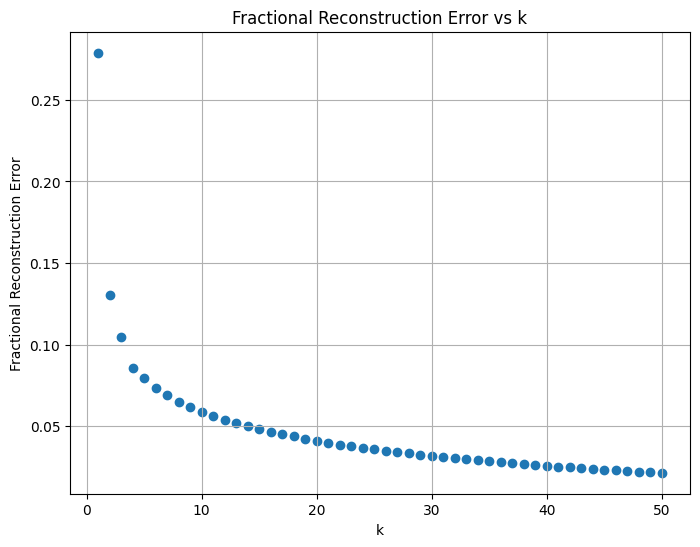

In [ ]:
#compute the fractional reconstruction error for each value of k
k_array = np.arange(1, 51)
fractional_errors = []

for i in k_array:
    eigenvalue_sum_k = np.sum(sorted_eigenvalues[:i])
    fractional_error = 1 - eigenvalue_sum_k / eigenvalue_sum
    fractional_errors.append(fractional_error)


plt.figure(figsize=(8, 6))
plt.scatter(k_array, fractional_errors, marker='o')
plt.xlabel('k')
plt.ylabel('Fractional Reconstruction Error')
plt.title('Fractional Reconstruction Error vs k')
plt.grid(True)
plt.show()

<ipython-input-6-4aa0f23f45e9>:15: ComplexWarning: Casting complex values to real discards the imaginary part
  ax.imshow(eigenvector_array[i].astype(float), cmap='gray')


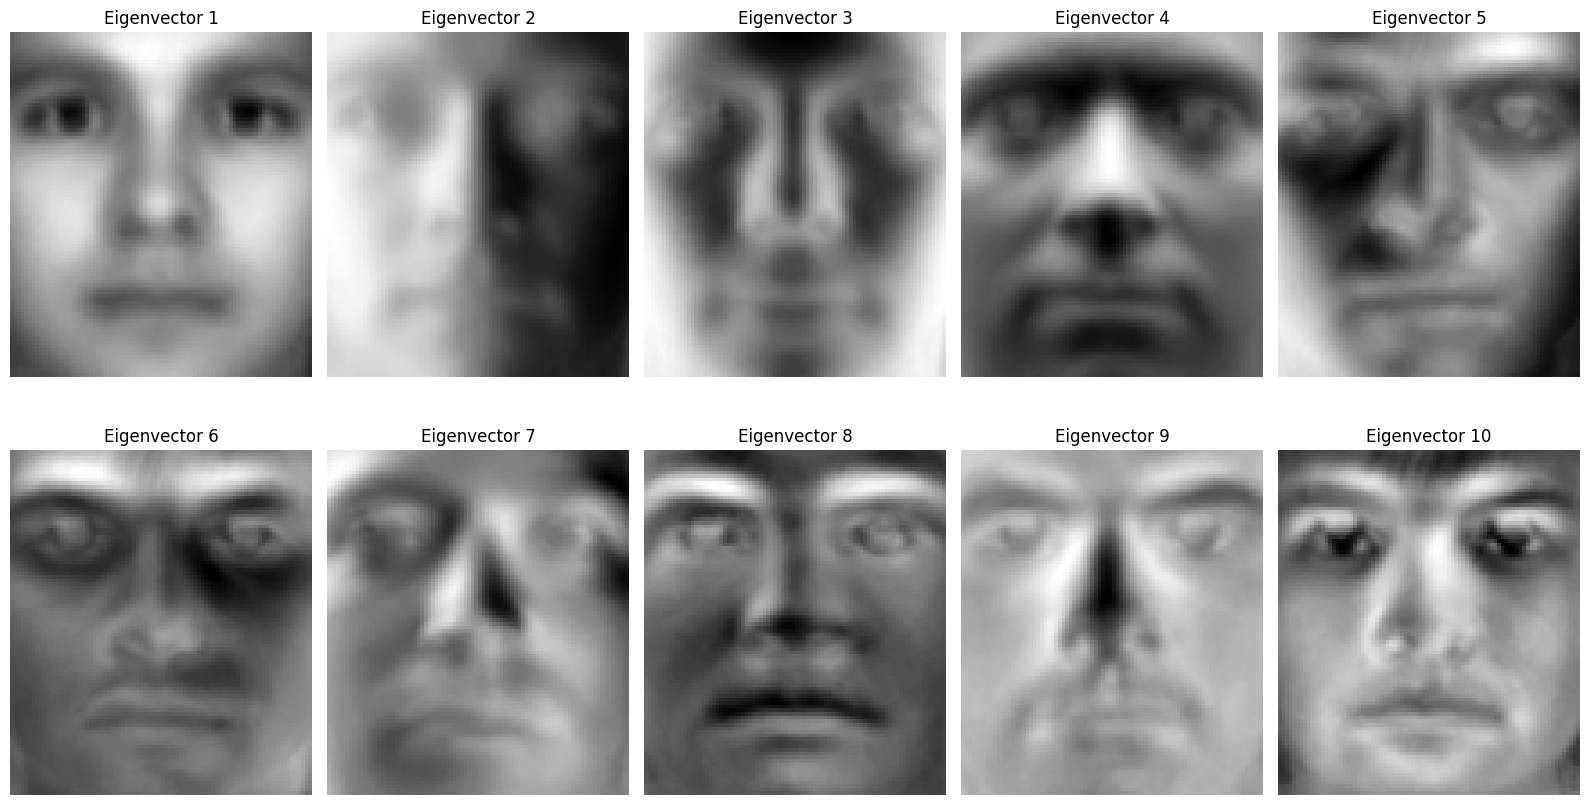

In [ ]:
#image dimension parameters
image_height = 96
image_width = 84
fig, axs = plt.subplots(2, 5, figsize=(16, 9))

#reshape the eigenvector images
top_10_eigenvectors = eigenvectors[:, sorted_indices[:10]]
eigenvector_array = top_10_eigenvectors.T.reshape(10, image_width, image_height)
eigenvector_array = np.transpose(eigenvector_array, axes=(0, 2, 1))


#plot top 10 eigenvectors
for i in range(10):
    ax = axs[i // 5, i % 5]
    ax.imshow(eigenvector_array[i].astype(float), cmap='gray')
    ax.set_title(f'Eigenvector {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

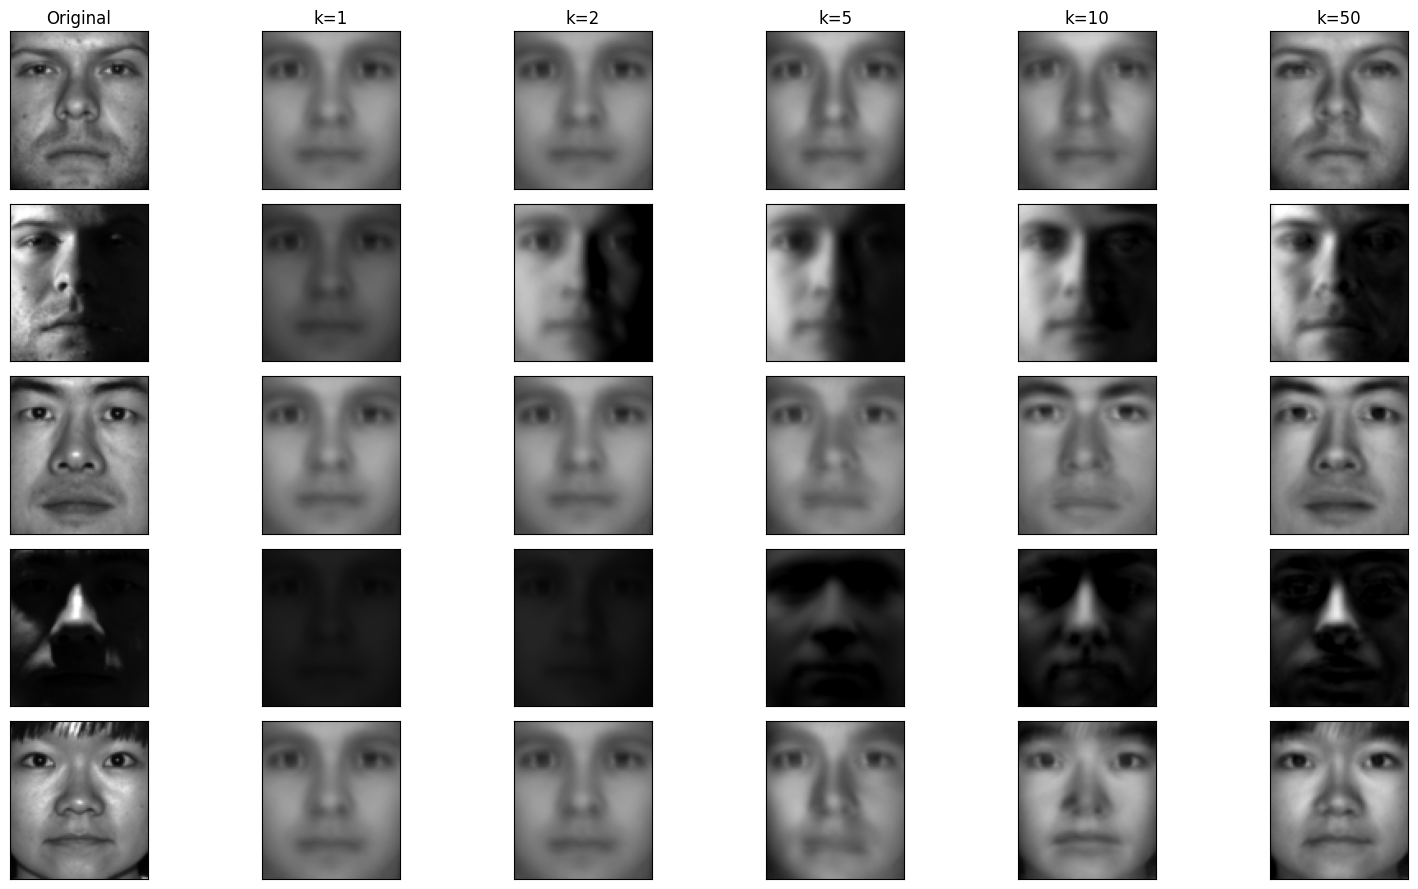

In [ ]:
fig, axs = plt.subplots(5, 6, figsize=(16, 9))
axs[0, 0].set_title('Original')
axs[0, 1].set_title('k=1')
axs[0, 2].set_title('k=2')
axs[0, 3].set_title('k=5')
axs[0, 4].set_title('k=10')
axs[0, 5].set_title('k=50')

num_plots_made = 1

#select faces 1, 24, 65, 68, and 257
for image_idx in [0, 23, 64, 67, 256]:
    original_image = X[image_idx]
    plt.subplot(5, 6, num_plots_made)
    plt.imshow(original_image.reshape((84, 96)).transpose(), cmap='gray', vmin=0, vmax=1)
    num_plots_made += 1

    #plot faces with 1, 2, 5, 10, and 50 top eigenvectors
    for k in [1, 2, 5, 10, 50]:
        top_eigenvectors = eigenvectors[:, :k]

        #create reconstruction matrix using top k eigenvectors
        reconstruction_matrix = top_eigenvectors @ top_eigenvectors.T

        image_vector = original_image.reshape((-1, 1))

        #reconstruct face using reconstrution matrix
        reconstruction_image = reconstruction_matrix @ image_vector

        #reshape and transpose image to fit dimensions
        reconstruction_image = np.real(reconstruction_image).reshape((84, 96)).transpose()

        #plot image
        plt.subplot(5, 6, num_plots_made)
        plt.imshow(reconstruction_image, cmap='gray', vmin=0, vmax=1)
        num_plots_made += 1

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
plt.tight_layout()
plt.show()